In [1]:
import pandas as pd
import numpy as np

In [2]:
# step 1

In [3]:
df= pd.read_csv('quotes.csv', encoding='latin1')

In [4]:
df.head()

,Quotes,Labels
0,Nature has given us all the pieces required to...,1
1,Try & try until you cannot succeed,0
2,"When you change your thoughts, remember to als...",1
3,"When you give joy to other people, you get mor...",1
4,Trying is the first step toward failure,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quotes  40 non-null     object
 1   Labels  40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [6]:
df.shape

(40, 2)

In [7]:
df['Labels'].value_counts()

1    20
0    20
Name: Labels, dtype: int64

In [8]:
# Step 2 Preprocessing

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [12]:
import regex as re

In [13]:
#stop words removal

In [14]:
df['Quotes'] = df['Quotes'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [15]:
df.head()

,Quotes,Labels
0,Nature given us pieces required achieve except...,1
1,Try & try cannot succeed,0
2,"When change thoughts, remember also change world",1
3,"When give joy people, get joy return. You give...",1
4,Trying first step toward failure,0


In [16]:
import string
df['Quotes']=df['Quotes'].str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-16-56e8706fbcef>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Quotes']=df['Quotes'].str.replace('[{}]'.format(string.punctuation), '')


In [17]:
df.head()

,Quotes,Labels
0,Nature given us pieces required achieve except...,1
1,Try try cannot succeed,0
2,When change thoughts remember also change world,1
3,When give joy people get joy return You give g...,1
4,Trying first step toward failure,0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
v = TfidfVectorizer()
x = v.fit_transform(df['Quotes']).toarray()
x = x.astype(float)

In [28]:
x.dtype

dtype('float64')

In [30]:
x.shape

(40, 204)

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [21]:
y = df['Labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
model = Sequential()
model.add(Dense(32, input_dim=204, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 123ms/step - loss: 0.6927 - accuracy: 0.5833 - val_loss: 0.7218 - val_accuracy: 0.1667
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6844 - accuracy: 0.6250 - val_loss: 0.7233 - val_accuracy: 0.1667
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6770 - accuracy: 0.6667 - val_loss: 0.7248 - val_accuracy: 0.1667
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6696 - accuracy: 0.6667 - val_loss: 0.7262 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6630 - accuracy: 0.6667 - val_loss: 0.7279 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6566 - accuracy: 0.7083 - val_loss: 0.7294 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6499 - accuracy: 0.7083 - val_loss: 0.7306 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

In [34]:
#accuracy plot

In [35]:
import matplotlib.pyplot as plt

In [36]:
def accuracy_plotting(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

In [37]:
#loss plotting

In [38]:
def Loss_plotting(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

## Model improvement 1

In [48]:
def model_improvement1(nodes):
  model = Sequential()
  model.add(Dense(nodes, input_dim=204, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
  return model

In [49]:
model1 = model_improvement1(8)

In [50]:
history1 = model1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 105ms/step - loss: 0.6988 - accuracy: 0.4167 - val_loss: 0.6726 - val_accuracy: 0.8333
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6738 - val_accuracy: 0.8333
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6919 - accuracy: 0.5833 - val_loss: 0.6750 - val_accuracy: 0.8333
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6886 - accuracy: 0.5833 - val_loss: 0.6759 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6857 - accuracy: 0.6250 - val_loss: 0.6768 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6831 - accuracy: 0.6250 - val_loss: 0.6776 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6802 - accuracy: 0.6667 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

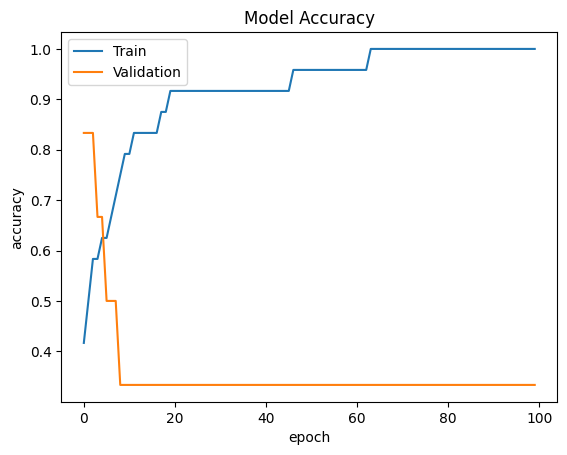

In [51]:
accuracy_plotting(history1)

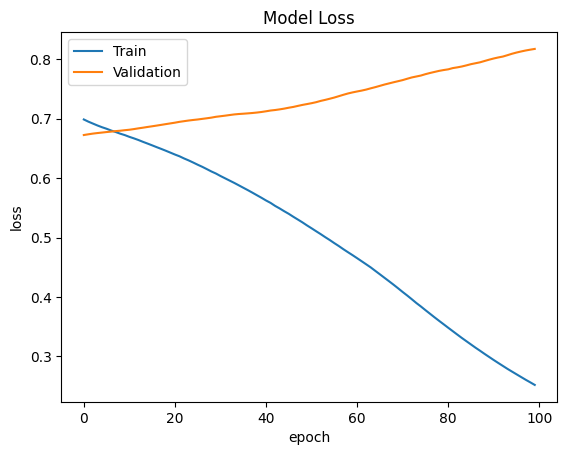

In [52]:
Loss_plotting(history1)

In [53]:
model2 = model_improvement1(6)

In [54]:
history2 = model2.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 207ms/step - loss: 0.7097 - accuracy: 0.3750 - val_loss: 0.6774 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 108ms/step - loss: 0.7068 - accuracy: 0.3750 - val_loss: 0.6784 - val_accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 68ms/step - loss: 0.7035 - accuracy: 0.4167 - val_loss: 0.6792 - val_accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 61ms/step - loss: 0.7008 - accuracy: 0.4167 - val_loss: 0.6800 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6980 - accuracy: 0.4167 - val_loss: 0.6809 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 57ms/step - loss: 0.6955 - accuracy: 0.4167 - val_loss: 0.6816 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 57ms/step - loss: 0.6926 - accuracy: 0.4167 - val_loss: 0.6824 - val_accuracy: 0.6667
Epoch 8/100
3/3 [=

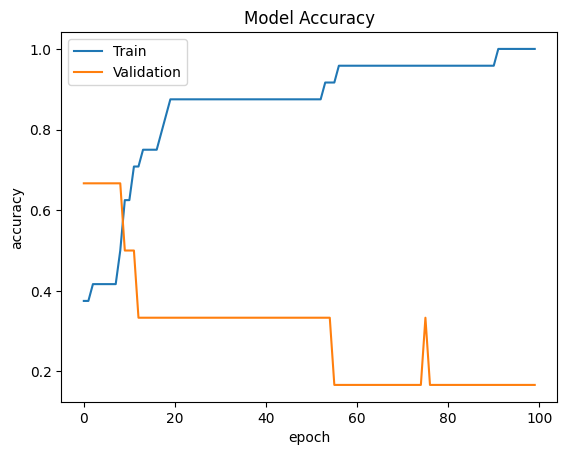

In [55]:
accuracy_plotting(history2)

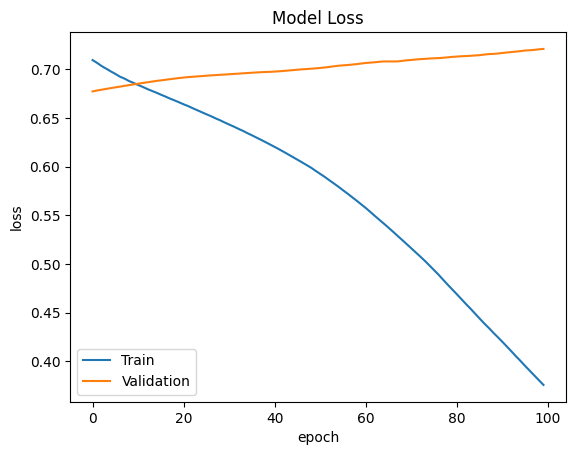

In [56]:
Loss_plotting(history2)

In [57]:
model3 = model_improvement1(32)

In [58]:
history3 = model3.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 240ms/step - loss: 0.6807 - accuracy: 0.6250 - val_loss: 0.7027 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6725 - accuracy: 0.6667 - val_loss: 0.7046 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6651 - accuracy: 0.7500 - val_loss: 0.7064 - val_accuracy: 0.1667
Epoch 4/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6576 - accuracy: 0.8333 - val_loss: 0.7079 - val_accuracy: 0.1667
Epoch 5/100
3/3 [==============================] - 0s 50ms/step - loss: 0.6509 - accuracy: 0.8750 - val_loss: 0.7098 - val_accuracy: 0.1667
Epoch 6/100
3/3 [==============================] - 0s 60ms/step - loss: 0.6441 - accuracy: 0.9167 - val_loss: 0.7116 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6373 - accuracy: 0.9167 - val_loss: 0.7133 - val_accuracy: 0.0000e+00
Epoch 8/100

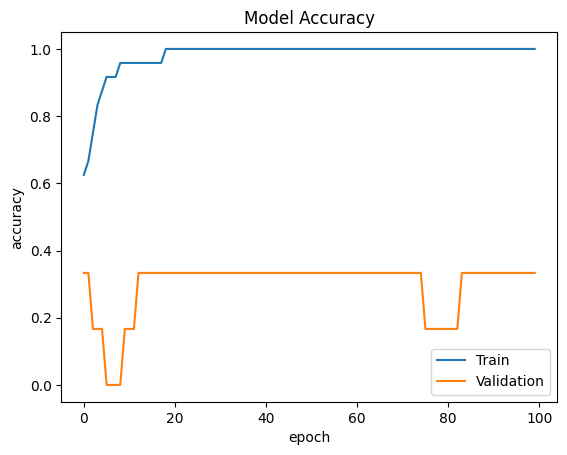

In [60]:
accuracy_plotting(history3)

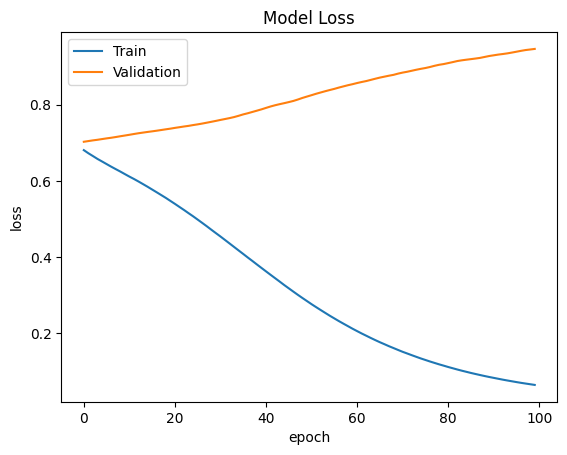

In [61]:
Loss_plotting(history3)

In [62]:
model4 = model_improvement1(64)

In [63]:
history4 = model4.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 165ms/step - loss: 0.6803 - accuracy: 0.6250 - val_loss: 0.7030 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6666 - accuracy: 0.7083 - val_loss: 0.7058 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6550 - accuracy: 0.7500 - val_loss: 0.7087 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6435 - accuracy: 0.7500 - val_loss: 0.7113 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6325 - accuracy: 0.7500 - val_loss: 0.7141 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6220 - accuracy: 0.7500 - val_loss: 0.7170 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6115 - accuracy: 0.7500 - val_loss: 0.7198 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

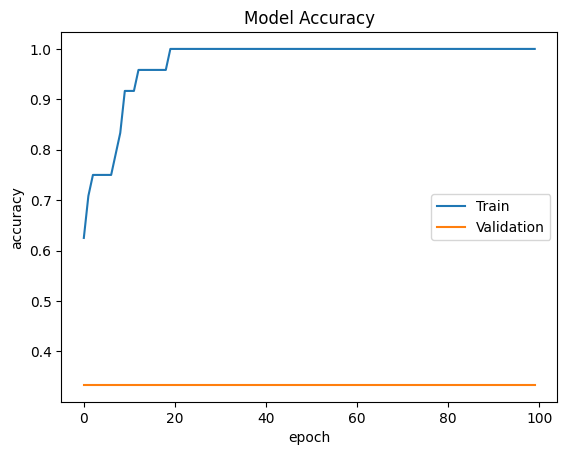

In [64]:
accuracy_plotting(history4)

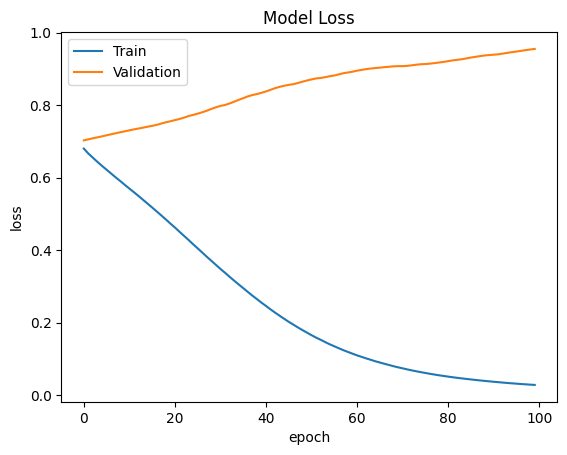

In [65]:
Loss_plotting(history4)

In [66]:
model5 = model_improvement1(128)
history5 = model5.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 157ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 0.6749 - accuracy: 0.6667 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6568 - accuracy: 0.8750 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6405 - accuracy: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6247 - accuracy: 1.0000 - val_loss: 0.6973 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6105 - accuracy: 1.0000 - val_loss: 0.7014 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 47ms/step - loss: 0.5952 - accuracy: 1.0000 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

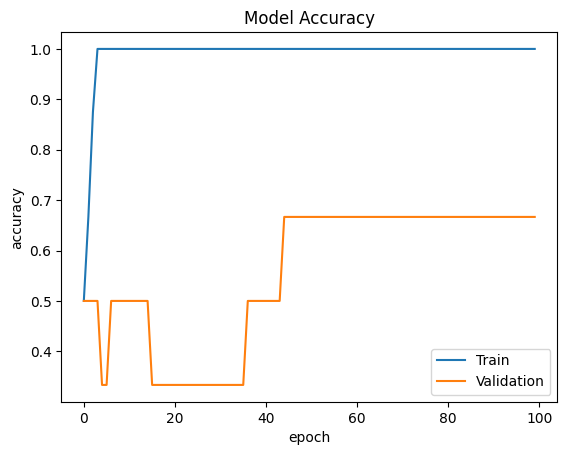

In [67]:
accuracy_plotting(history5)

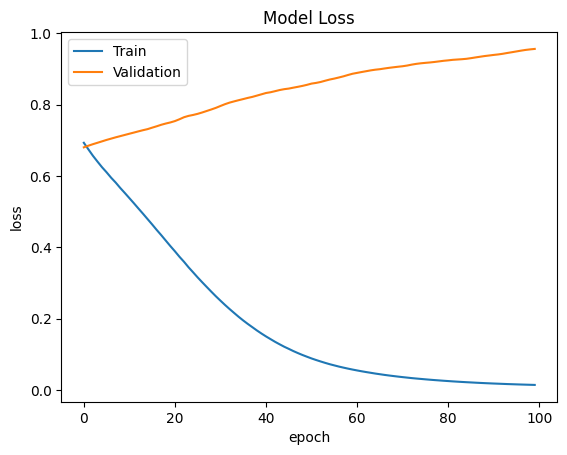

In [68]:
Loss_plotting(history5)

In [69]:
model6 = model_improvement1(256)
history6 = model6.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 153ms/step - loss: 0.6918 - accuracy: 0.6250 - val_loss: 0.7008 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6659 - accuracy: 0.8333 - val_loss: 0.7060 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.6424 - accuracy: 0.8333 - val_loss: 0.7099 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6210 - accuracy: 0.8750 - val_loss: 0.7144 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6006 - accuracy: 0.9167 - val_loss: 0.7191 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.5821 - accuracy: 1.0000 - val_loss: 0.7245 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 39ms/step - loss: 0.5619 - accuracy: 1.0000 - val_loss: 0.7297 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

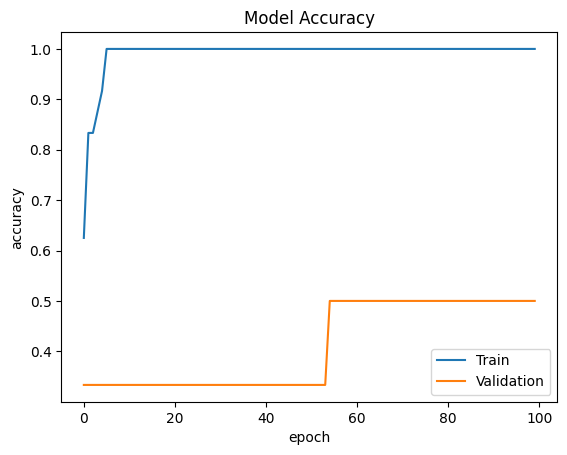

In [70]:
accuracy_plotting(history6)

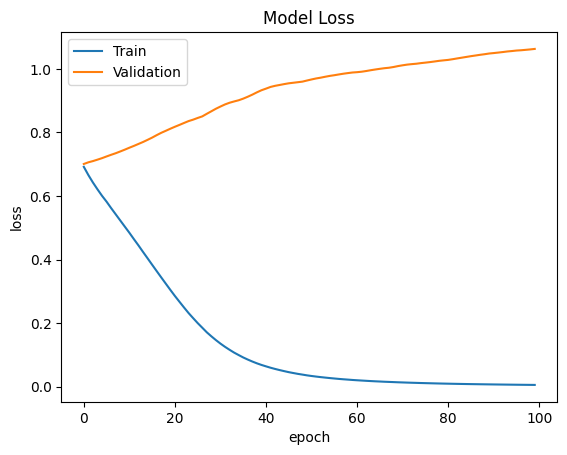

In [71]:
Loss_plotting(history6)

In [72]:
model7 = model_improvement1(512)
history7 = model7.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 195ms/step - loss: 0.6929 - accuracy: 0.5833 - val_loss: 0.6874 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6552 - accuracy: 0.9583 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6251 - accuracy: 1.0000 - val_loss: 0.6958 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 65ms/step - loss: 0.5979 - accuracy: 1.0000 - val_loss: 0.7013 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 0.5701 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 38ms/step - loss: 0.5438 - accuracy: 1.0000 - val_loss: 0.7121 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 0.5179 - accuracy: 1.0000 - val_loss: 0.7180 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

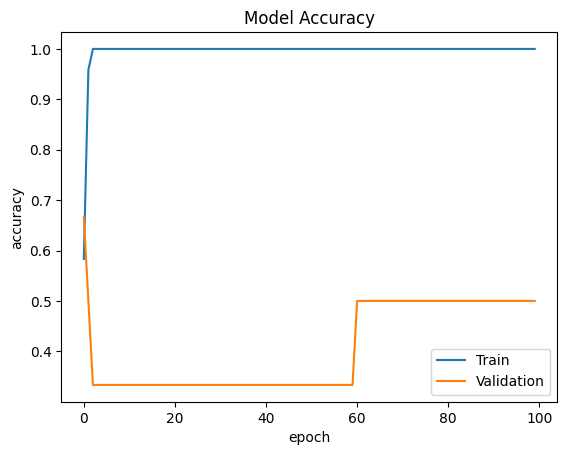

In [73]:
accuracy_plotting(history7)

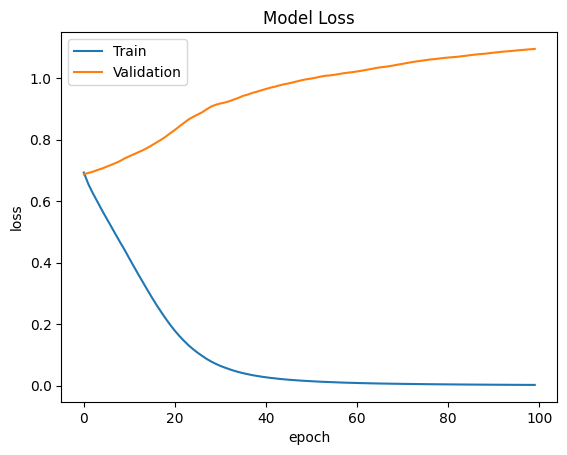

In [74]:
Loss_plotting(history7)

## Model Improvement 2

In [75]:
#2 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=204, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [76]:
hist1 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 175ms/step - loss: 0.6850 - accuracy: 0.5833 - val_loss: 0.6951 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 54ms/step - loss: 0.6778 - accuracy: 0.7083 - val_loss: 0.6962 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6719 - accuracy: 0.7500 - val_loss: 0.6981 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6667 - accuracy: 0.7500 - val_loss: 0.6999 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6609 - accuracy: 0.7917 - val_loss: 0.7011 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6556 - accuracy: 0.7917 - val_loss: 0.7031 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6493 - accuracy: 0.7917 - val_loss: 0.7053 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

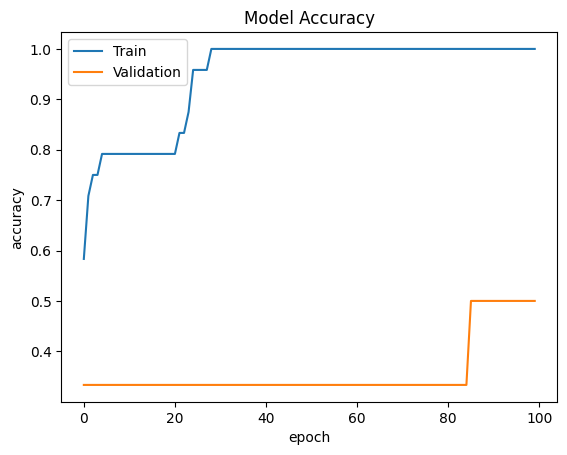

In [77]:
accuracy_plotting(hist1)

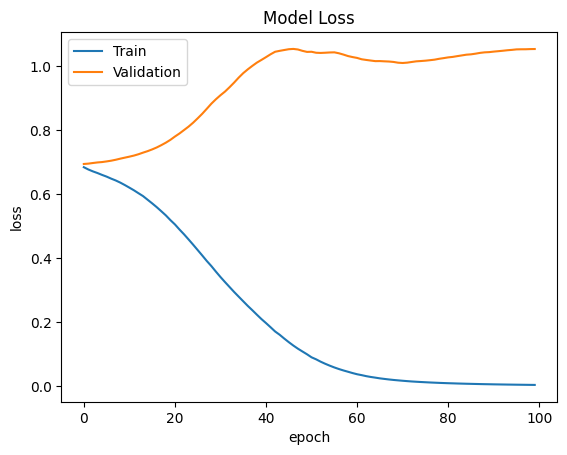

In [78]:
Loss_plotting(hist1)

In [79]:
#3 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=204, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [80]:
hist2 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 179ms/step - loss: 0.6889 - accuracy: 0.5833 - val_loss: 0.6999 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6817 - accuracy: 0.6667 - val_loss: 0.7017 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6763 - accuracy: 0.6667 - val_loss: 0.7034 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6706 - accuracy: 0.6667 - val_loss: 0.7049 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6649 - accuracy: 0.7083 - val_loss: 0.7074 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6590 - accuracy: 0.7083 - val_loss: 0.7110 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 45ms/step - loss: 0.6511 - accuracy: 0.7083 - val_loss: 0.7148 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

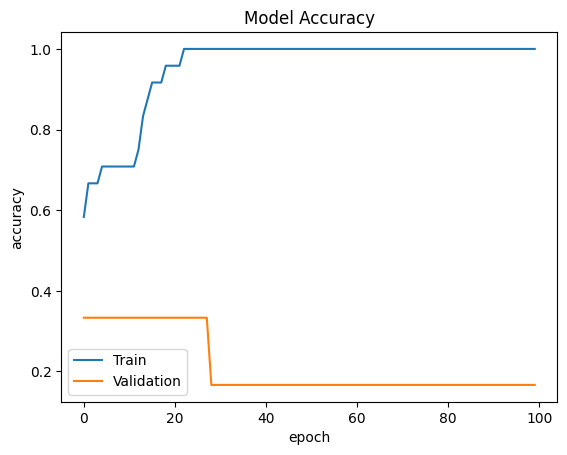

In [81]:
accuracy_plotting(hist2)

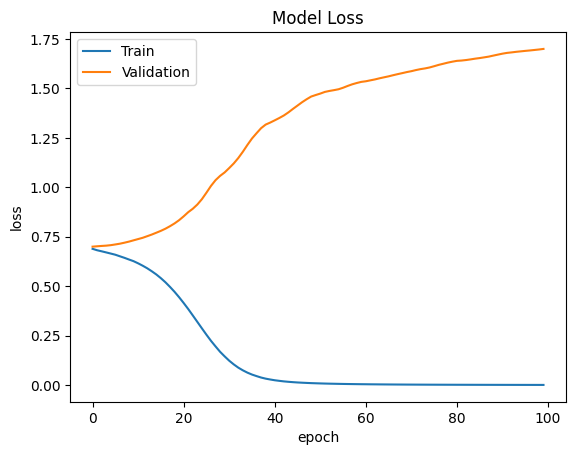

In [82]:
Loss_plotting(hist2)

In [83]:
# 4 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=204, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [84]:
hist3 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 353ms/step - loss: 0.6894 - accuracy: 0.6667 - val_loss: 0.6982 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 48ms/step - loss: 0.6820 - accuracy: 0.7083 - val_loss: 0.7023 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 68ms/step - loss: 0.6745 - accuracy: 0.6667 - val_loss: 0.7063 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 62ms/step - loss: 0.6673 - accuracy: 0.6667 - val_loss: 0.7105 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 49ms/step - loss: 0.6604 - accuracy: 0.6667 - val_loss: 0.7156 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6521 - accuracy: 0.6250 - val_loss: 0.7217 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 64ms/step - loss: 0.6440 - accuracy: 0.6250 - val_loss: 0.7290 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

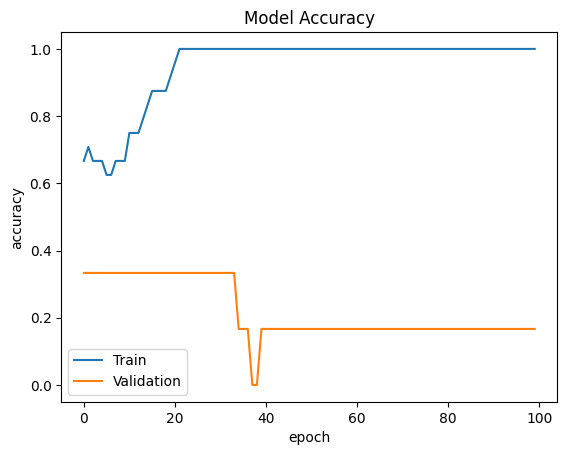

In [85]:
accuracy_plotting(hist3)

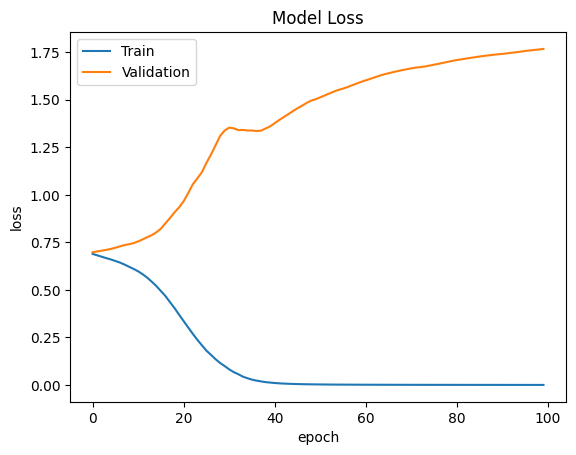

In [86]:
Loss_plotting(hist3)

In [87]:
# 5 layers with 32 nodes
model = Sequential()
model.add(Dense(32, input_dim=204, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [88]:
hist4 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 193ms/step - loss: 0.6972 - accuracy: 0.3333 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6920 - accuracy: 0.5833 - val_loss: 0.6962 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6889 - accuracy: 0.6250 - val_loss: 0.6975 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6862 - accuracy: 0.6250 - val_loss: 0.6985 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6840 - accuracy: 0.6250 - val_loss: 0.6996 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 45ms/step - loss: 0.6816 - accuracy: 0.6250 - val_loss: 0.7009 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6792 - accuracy: 0.6250 - val_loss: 0.7030 - val_accuracy: 0.3333
Epoch 8/100
3/3 [==

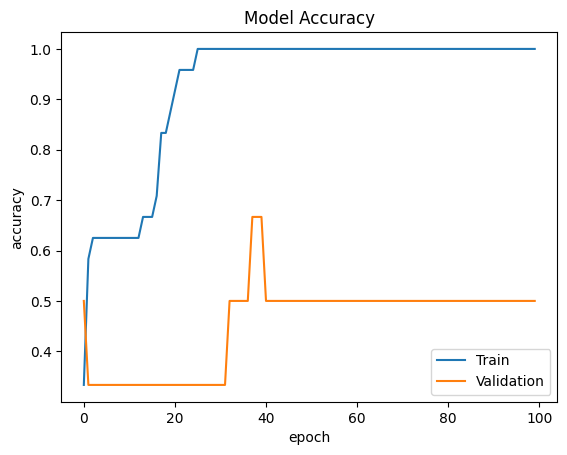

In [89]:
accuracy_plotting(hist4)

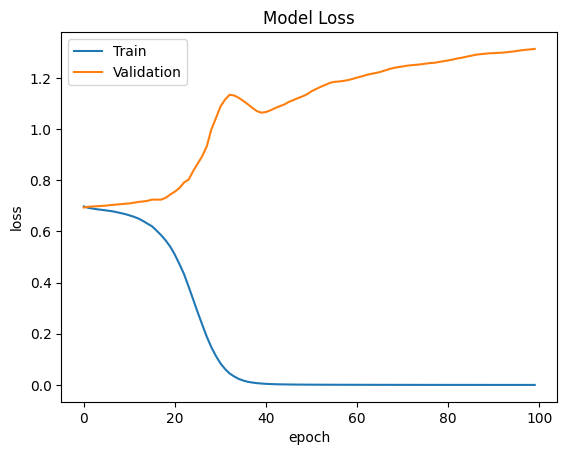

In [91]:
Loss_plotting(hist4)